<a href="https://colab.research.google.com/github/imend35/verianalizokulu-yapayzeka-python/blob/main/G%C3%BCmr%C3%BCk_Verileriyle_Lojistik_Firma_Segmentasyonu.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [5]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns # <-- EKLENDİ! Artık 'sns' tanımı geçerli
from sklearn.cluster import KMeans

def lojistik_firma_verisi_olustur():
    # 50 farklı firma için rastgele veriler
    np.random.seed(42)

    veri = {
        'Firma_ID': range(1, 51),
        'Islem_Hacmi': np.random.randint(1000, 5000, 50),
        'Ort_Islem_Suresi': np.random.normal(loc=90, scale=30, size=50)
    }
    df = pd.DataFrame(veri)
    return df
from sklearn.cluster import KMeans # Yeni kütüphane: Makine Öğrenimi

def lojistik_firma_verisi_olustur():
    # 50 farklı firma için rastgele veriler
    np.random.seed(42) # Her çalıştırmada aynı rastgele sonucu almak için

    veri = {
        'Firma_ID': range(1, 51),
        # Simüle edilmiş işlem hacmi (1000 - 5000)
        'Islem_Hacmi': np.random.randint(1000, 5000, 50),
        # Simüle edilmiş ortalama işlem süresi (dakika)
        'Ort_Islem_Suresi': np.random.normal(loc=90, scale=30, size=50)
    }
    df = pd.DataFrame(veri)
    return df

In [6]:
def k_means_uygula(df, k_degeri=3):

    # 1. Veriyi Seçme: Sadece kümelemede kullanacağımız sütunları seçiyoruz (X)
    X = df[['Islem_Hacmi', 'Ort_Islem_Suresi']]

    # 2. Modeli Oluşturma ve Eğitme (Fit)
    kmeans = KMeans(n_clusters=k_degeri, random_state=42, n_init=10)
    # model.fit(X) metodu ile model veriden öğrenir (Konu 12)
    kmeans.fit(X)

    # 3. Sonuçları Tahmin Etme ve DataFrame'e Ekleme
    df['Kume'] = kmeans.labels_ # Her firmaya ait küme numarasını ekler (0, 1, 2)

    # Küme merkezlerini alma (her kümenin ortalama koordinatları)
    merkezler = kmeans.cluster_centers_

    return df, merkezler

In [7]:
def kumeleme_grafik_ciz(df, merkezler):

    plt.figure(figsize=(10, 7))

    # Saçılım Grafiği (Scatter Plot): Her firmayı küme rengiyle gösterir
    sns.scatterplot(x='Islem_Hacmi', y='Ort_Islem_Suresi', hue='Kume', data=df,
                    palette='viridis', s=100, legend='full')

    # Küme Merkezlerini İşaretleme
    plt.scatter(merkezler[:, 0], merkezler[:, 1], marker='X', s=200,
                color='red', label='Küme Merkezleri')

    plt.title('Gümrük Firması Segmentasyonu (K-Means)', fontsize=14)
    plt.xlabel('İşlem Hacmi')
    plt.ylabel('Ortalama İşlem Süresi (dk)')
    plt.legend(title='Firma Segmenti')
    plt.grid(True)
    plt.show()

--- Proje 4: K-Means ile Firma Segmentasyonu Başladı ---

--- İlk 5 Firmanın Küme Ataması ---
   Firma_ID  Islem_Hacmi  Ort_Islem_Suresi  Kume
0         1         4174         71.115751     0
1         2         4507        107.931614     0
2         3         1860        166.784641     1
3         4         2294        101.826991     1
4         5         2130         93.666575     1


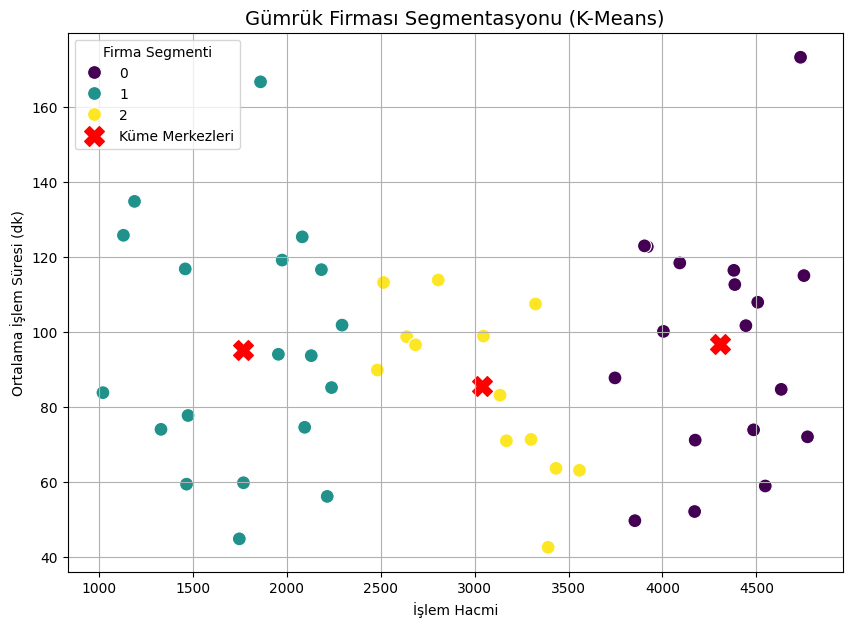

In [8]:
print("--- Proje 4: K-Means ile Firma Segmentasyonu Başladı ---")
firma_df = lojistik_firma_verisi_olustur()
firma_df_kumelenmis, merkezler = k_means_uygula(firma_df)

print("\n--- İlk 5 Firmanın Küme Ataması ---")
print(firma_df_kumelenmis.head())

kumeleme_grafik_ciz(firma_df_kumelenmis, merkezler)